# <span style="color:blue">Programação Python para Ciência de Dados</span>

## <span style="color:blue">Laboratório 4: Numpy parte II, Matplotlib, Pandas parte II</span>
---


Nesse laboratório vamos trabalhar com um conjunto de dados **ESC2013\_RMSP\_CEM.csv** que contém informações sobre escolas de ensino médio de São Paulo.


**0)**

**a)** Carregue os pacotes: `numpy`, `pandas` e `matplotlib` 

In [1]:
# seu código aqui
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Utilize esse comando para mostrar mais colunas em um dataset:
pd.set_option('display.max_columns', 50)

# E esse para mostrar plots maiores:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
# Algumas definições de arquivos
DATA_DIR = "EnsinoMedio/"
schools_file = DATA_DIR + "ESC2013_RMSP_CEM.csv"

**b)** Leio o arquivo definido acima com pandas, armazene em uma variável chamada `schools` e mostre as primeiras 5 linhas do DataFrame:

In [4]:
df = pd.read_csv(schools_file)
df.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,...,230.40,220.14,4.18,229.93,229.88,4.33,242.32,248.41,4.85,247.08,238.32,4.76,NaN,3.7,4.2,4.5,4.4,NaN,NaN,NaN,NaN,NaN,NaN,47.3253,Medio
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,...,241.29,226.74,4.47,172.40,170.80,2.39,249.23,244.94,4.90,244.75,231.59,4.61,NaN,4.2,2.3,4.7,4.4,451.33,469.34,480.52,485.11,444.71,469.92,49.3778,Medio


Esse dataset contêm diversas informações sobre escolas de ensino médio na região metropolitana de São Paulo. Para saber o que cada coluna significa, refira-se ao arquivo `DicionarioESC.pdf`.

**1)** 

**a)** Existem muitos valores faltantes na conjunto de dados? Se sim, imprima a coluna com mais valores faltantes e o número de valores faltantes em tal coluna.

**DICA**: Utilize os métodos do _pandas_ [.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), [.idxmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) (que retorna o indíce de uma série onde o valor máximo ocorre) e o método .max().

In [5]:
# Vamos ver quantos valores nulos temos
nulos_por_coluna = df.isna().sum()

# Vamos somar o nro em cada coluna para sabermos o total
nulos_por_coluna.sum()

776346

In [6]:
# Descobrindo coluna com mais nulos
coluna_mais_nulos = nulos_por_coluna.idxmax()

# Pegando numero de nulos nessa coluna
numero_nulos =  nulos_por_coluna.max()


print(coluna_mais_nulos)
print(numero_nulos)

COD_SC
10937


**b)** Quantas colunas possuem 1 ou mais valores nulo?

In [7]:
# Pegando uma series com True ou False indicando se a coluna tem 1 ou mais nulos
colunas_com_nulos = nulos_por_coluna >= 1

print(colunas_com_nulos[10:20]) # Imprimindo essa Series do indice 10 ao 19

COD_SC       True
COD_DEP     False
TIP_DEP     False
BAIRRO       True
CEP          True
END_ESC      True
NUM_ESC      True
DDD          True
TELEFONE     True
LOCALIZA    False
dtype: bool


In [8]:
# Somando True e False obteremos o numeros de Trues
total_com_nulos = colunas_com_nulos.sum()

print(total_com_nulos)

96


**c)** Existem entradas duplicadas no conjunto de dados?

In [9]:
# Pegando o total de duplicadas
total_duplicadas = df.duplicated().sum()

print(total_duplicadas)

0


**2)**

**a)** Faça um plot onde cada escola é um ponto, com o eixo X represetando a longitude e o eixo y a lattitude onde a escola está localizada (colunas "LONGITUDE" e "LATITUDE" do DataFrame).

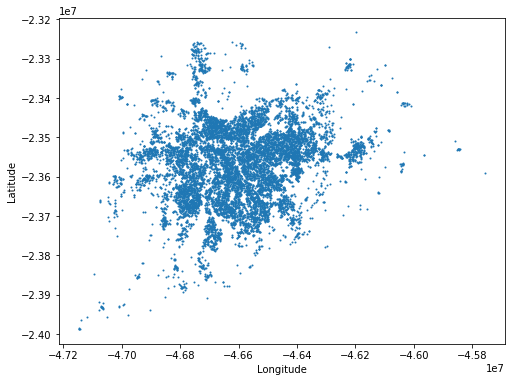

In [10]:
plt.figure(figsize=(8, 6)) # Mudando tamanho da figura

plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], s=1) # Plotando os dados
plt.xlabel('Longitude') # Adicionando nome do eixo
plt.ylabel('Latitude'); # Adicionando nome do eixo

Observe que existe uma escola cuja longitude é maior que todas as outras.

**b)** Repita o plote acima, mas indicando com uma seta a escola com maior longitude. Sem utilizar o método .max, qual o nome (coluna `NOMEESC`) dessa escola?

**DICA**: No python, podemos usar a notação `3.4e7` para representar o número $ 3.4^{10}$. 

In [11]:
maior = df['LONGITUDE'].idxmax() # Pega a cidada mais a direita
coord = df.loc[maior, ['LONGITUDE', 'LATITUDE']].values # Pega as coordenadas dessa cidade

In [12]:
# Vamos ver o nome dessa cidade
nome_maior_long = df.loc[maior, 'NOMEESC']
print(nome_maior_long)

ANTONIO RODRIGUES DOS SANTOS EMEF


Text(-45856429.0, -23691099.0, 'ANTONIO RODRIGUES DOS SANTOS EMEF')

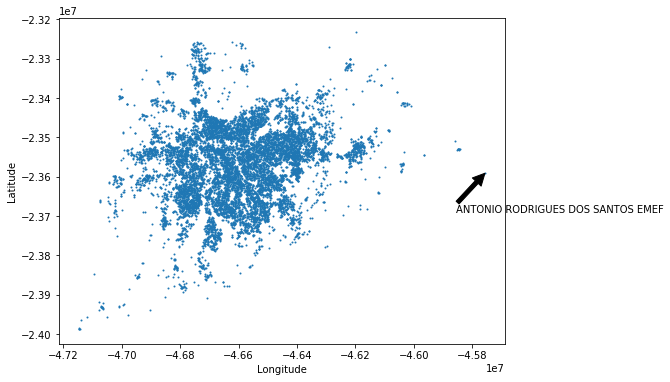

In [13]:
# seu código aqui
plt.figure(figsize=(8, 6)) # Mudando tamanho da figura
plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], s=1) # Plotando
plt.xlabel('Longitude') # Adicionando nome do eixo
plt.ylabel('Latitude') # Adicionando nome do eixo

coord_seta = coord - np.array([1e5, 1e5]) # Lugar onde a seta termina

plt.annotate(nome_maior_long, xy=coord, xytext= coord - np.array([1e5, 1e5]),
            arrowprops=dict(facecolor='black'))

**3)**

A coluna `COD_DEP` representa o código da dependência administrativa da escola (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada).

Faça um gráfico de barras mostrando a quantidade de escolas em cada uma das categorias.

**DICA**: Utilize o método `.value_counts()` do Pandas e `.bar()` do matplotlib

In [14]:
# Vamos obter a contagem
contagem = df['COD_DEP'].value_counts()

# Ordenar pelo indice
contagem = contagem.sort_index()

print(contagem)

1       4
2    2303
3    3405
4    5225
Name: COD_DEP, dtype: int64


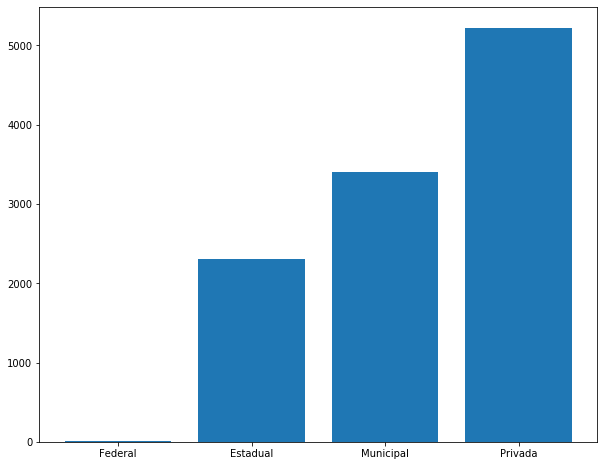

In [15]:
# Plotando o grafico de barras
plt.bar(np.arange(1, 5), contagem)

# Alterando o nome na eixo x
plt.xticks(np.arange(1, 5), ('Federal', 'Estadual', 'Municipal', 'Privada'));

O Pandas também oferece recursos para visualização que muitas vezes são mais simples de utilizar. Por exemplo, o exemplo acima se resume a uma linha de código utilizando o comando`.hist()` do pandas.

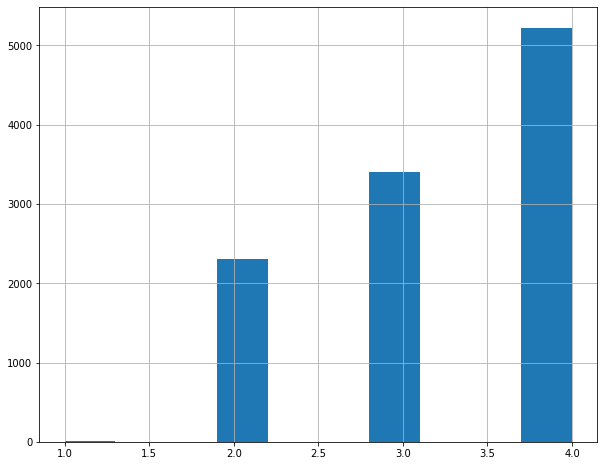

In [16]:
df['COD_DEP'].hist()

## Dados faltantes

Vamos exercitar algumas alternativas para tratar dados faltantes

**4)**

**a)** O conjunto de dados **ESC2013_RMSP_CEM.csv** possui muitos dados faltantes. Se adotarmos a estratégia de remover todas as linhas que possui 1 ou mais valores faltantes, qual a porcentagem dos dados que será removida?

In [17]:
# Numero de nulos em cada linha
nulos_por_linha = df.isna().sum(axis=1)

print(nulos_por_linha[:10])

0    63
1    89
2    88
3    39
4     9
5    81
6    36
7    59
8    39
9    89
dtype: int64


In [18]:
# Vamos obter um Series True/False indicando se temos um nulo na linha
linhas_com_nulos = nulos_por_linha > 0

# Vamos somar o Series (soma em booleanos dá o numero de Trues)
total_linhas_com_nulos = linhas_com_nulos.sum()

# Vamos ver a porcentagem de linhas com nulos
perc_nulos = total_linhas_com_nulos / df.shape[0] * 100

print(f'{perc_nulos:.2f}% das linhas tem nulos')

100.00% das linhas tem nulos


**b)** Remover linhas com valores faltantes não é uma alternativa viável. Vamos tentar outra abordagem:

- Considere apenas as **colunas** que possuem menos que 7656 (cerca de 70% do nosso conjunto de dados) de nulos.
- Elimine todas as linhas em que aparecem 1 ou mais valores faltantes essas colunas.
- Qual a porcentagem de dados que restam no DataFrame?

In [19]:
# Numero de nulos em cada coluna
nulos_por_coluna = df.isna().sum()

print(nulos_por_coluna[10:20])

COD_SC      10937
COD_DEP         0
TIP_DEP         0
BAIRRO          7
CEP             3
END_ESC         3
NUM_ESC         3
DDD          1100
TELEFONE     1100
LOCALIZA        0
dtype: int64


In [20]:
# Obtendo serie com booleans indicando se coluna tem menos de 70% de nulos
colunas_uteis = nulos_por_coluna < 0.7 * df.shape[0]
print(colunas_uteis[10: 20])

COD_SC      False
COD_DEP      True
TIP_DEP      True
BAIRRO       True
CEP          True
END_ESC      True
NUM_ESC      True
DDD          True
TELEFONE     True
LOCALIZA     True
dtype: bool


In [21]:
# Vamos considerar apenas as colunas com menos de 70% de nulos
df_filtrado = df.loc[:, colunas_uteis.values]

In [22]:
nulos_por_linha = df_filtrado.isna().sum(axis=1)
a = nulos_por_linha > 0
a.sum()

9764

In [23]:
# Agora vamos fazer exatamente o mesmo do item a)
nulos_por_linha = df_filtrado.isna().sum(axis=1)
linhas_com_nulos = nulos_por_linha > 0
total_linhas_com_nulos = linhas_com_nulos.sum()
perc_nulos = total_linhas_com_nulos / df_filtrado.shape[0] * 100

print(f'{perc_nulos:.2f}% das linhas tem nulos')

89.27% das linhas tem nulos


**c)** Vamos considerar uma 3 abordagem:

- Preencha os valores faltantes das colunas com mais que 7656 faltantes com a moda dos valores da coluna.
- Salve esse resultado em um DataFrame chamado "schools_filled"

**Dica**: Utilize o método `.mode()` do Pandas. Note que a função da moda pode retornar vários valores caso haja um empate para a moda.

In [24]:
# Obtendo as modas
modas = df_filtrado.mode()
modas.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,...,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ,AP5EF_07,AP5EF_08,AP5EF_09,AP5EF_10,AP9EF_10,AP5EF_11,AP9EF_11,AP5EF_12,AP9EF_12,AP5EF_13,AP9EF_13,AP5EF_14,AP9EF_14,INSE_AB,INSE_CL
0,1,-46735695.0,-23663271.0,35000012,35000012,FENIX COLEGIO,SAO PAULO,3550308.0,GUARULHOS,351880005.0,4.0,Privada,CENTRO,7700000.0,R SAO JOAO,S/N,11,--,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,52.7779,Medio Alto
1,3,-46593982.0,-23530345.0,35000024,35000024,INTEGRACAO COLEGIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,-46556889.0,-23514886.0,35000036,35000036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,35000048,35000048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,35000059,35000059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Considerando apenas uma moda
modas = modas.iloc[0]
modas[:10]

ID                       1
LONGITUDE     -4.67357e+07
LATITUDE      -2.36633e+07
CODESC            35000012
CODESCTX          35000012
NOMEESC      FENIX COLEGIO
NOMEMUN          SAO PAULO
CODMUN         3.55031e+06
NOMDIST          GUARULHOS
CODDIST         3.5188e+08
Name: 0, dtype: object

In [26]:
# Agora basta substituir os nulos pelas modas
df_filtrado_preenchido = df_filtrado.fillna(modas)

In [27]:
# Agora vamos fazer exatamente o mesmo do item a)
nulos_por_linha = df_filtrado_preenchido.isna().sum(axis=1)
linhas_com_nulos = nulos_por_linha > 0
total_linhas_com_nulos = linhas_com_nulos.sum()
perc_nulos = total_linhas_com_nulos / df_filtrado_preenchido.shape[0] * 100

print(f'{perc_nulos:.2f}% das linhas tem nulos')

0.00% das linhas tem nulos



---


## Utilizando mais dados

Vamos agora incluir mais um arquivo na análise:

In [28]:
# Algumas definições de arquivos
ENEM_FILE = DATA_DIR + "ENEM2015.csv"

**5)**

**a)** Leio o arquivo definido acima com pandas, armazene em um DataFrame chamado `enem` e mostre suas primeiras 5 linhas:

In [29]:
# Lendo o arquivo do disco
enem = pd.read_csv(ENEM_FILE)

# Vamos chamar de escolas o arquivo que tratamos nos exercicios anteriores
escolas = df_filtrado_preenchido.copy()

In [30]:
# Vamos ver o dado do ENEM
enem.head()

,CODIGO DA ENTIDADE,NUMERO DE PARTICIPANTES,Classificacao
0,35000139,142,1
1,35000140,79,1
2,35000267,131,2
3,35000280,146,1
4,35000334,95,1


In [31]:
# Vamos ver o dado do escolas
escolas.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,...,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ,AP5EF_07,AP5EF_08,AP5EF_09,AP5EF_10,AP9EF_10,AP5EF_11,AP9EF_11,AP5EF_12,AP9EF_12,AP5EF_13,AP9EF_13,AP5EF_14,AP9EF_14,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,93.6,97.5,94.4,98.4,100.0,96.2,100.0,93.6,100.0,96.4,100.0,100.0,100.0,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,52.7779,Medio Alto
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,100.0,100.0,100.0,100.0,100.0,98.2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,52.7779,Medio Alto
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,100.0,100.0,100.0,100.0,84.9,100.0,98.1,100.0,87.6,100.0,83.1,100.0,84.7,47.3253,Medio
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,82.1,86.5,85.7,100.0,94.3,100.0,100.0,88.9,94.6,96.0,90.6,100.0,92.5,49.3778,Medio


**b)** Junte o DataFrame `enem` com o dataframe `schools_filled`, utilizando as colunas "CODESC" e "Código da Entidade" como chave, através da função [**.merge**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

Utilize a estratégia de só incluir os exemplos quando aparece em ambos os DataFrames.

In [32]:
# Vamos realizar o merge (por padrão o marge do pandas é o inner merge)
tudo = pd.merge(escolas, enem, left_on='CODESC', right_on='CODIGO DA ENTIDADE')

In [33]:
# Vamos analisar as shapes das entradas e do resultado
print(escolas.shape)
print(enem.shape)
print(tudo.shape)

(10937, 62)
(1243, 3)
(1243, 65)


**Podemos ver que foi mantido o número de escolas do ENEM, uma vez que todas do ENEM estavam na *escolas* mas nem todas de *escolas* estavam no ENEM**

**c)** Quais são os possíveis valores na coluna "INSE_CL" (Classificação do Indicador de Nível Socioeconômico) ?

In [34]:
# Vamos usar a função unique() do pandas para isso
tudo['INSE_CL'].unique()

array(['Alto', 'Medio', 'Medio Alto', 'Muito Alto'], dtype=object)

**d)** Troque os valores categóricos pelos valores: Medio = 0, Medio Alto = 1, Alto = 2, Muito Alto = 3

Substitua a coluna original.

In [35]:
# Definindo o dicionário de mapeamento
mapeamento = {'Medio': 0, 'Medio Alto': 1, 'Alto': 2, 'Muito Alto': 3}

# Realizando o mapeamento
tudo.loc[:, 'INSE_CL'] = tudo['INSE_CL'].map(mapeamento)